In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from MNIST import dense_nn_model, conv_nn_model
from keras.metrics import BinaryAccuracy

In [2]:
df = pd.read_csv('train.csv')
y = df['label']
df.drop('label', axis=1, inplace=True)

In [3]:
X = df / 254

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dummy_y = np_utils.to_categorical(y_train)

In [6]:
es = EarlyStopping(patience=6, verbose=3, monitor='loss')

In [7]:
model1 = dense_nn_model()

In [8]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 520)               408200    
                                                                 
 activation_1 (Activation)   (None, 520)               0         
                                                                 
 dropout_1 (Dropout)         (None, 520)               0     

In [9]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=BinaryAccuracy())

In [10]:
model1.fit(X_train, dummy_y,  epochs=1, batch_size=500, callbacks=es)

68/68 [==============================] - 4s 42ms/step - loss: 0.4625 - binary_accuracy: 0.9733


In [11]:
y_pred = model1.predict(X_test).round()
dummy_y_test = np_utils.to_categorical(y_test)
print(classification_report(dummy_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       816
           1       0.98      0.98      0.98       909
           2       0.98      0.90      0.94       846
           3       0.96      0.89      0.92       937
           4       0.93      0.96      0.94       839
           5       0.93      0.93      0.93       702
           6       0.97      0.96      0.97       785
           7       0.97      0.92      0.94       893
           8       0.95      0.91      0.93       835
           9       0.91      0.92      0.92       838

   micro avg       0.95      0.93      0.94      8400
   macro avg       0.95      0.93      0.94      8400
weighted avg       0.95      0.93      0.94      8400
 samples avg       0.93      0.93      0.93      8400



C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
data_to_transform = np.array(df)
X = np.reshape(data_to_transform, (42000, 28, 28, 1))
X = X / 254

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model2 = conv_nn_model()

In [15]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 activation_4 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 activation_5 (Activation)   (None, 14, 14, 128)       0         
                                                           

In [16]:
es = EarlyStopping(patience=6, verbose=3, monitor='loss')

In [17]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model2.fit(X_train, dummy_y, epochs=1, batch_size=500, callbacks=es)

68/68 [==============================] - 99s 1s/step - loss: 0.3296 - accuracy: 0.8970


In [19]:
y_pred = model2.predict(X_test).round()
dummy_y_test = np_utils.to_categorical(y_test)
print(classification_report(dummy_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.96      0.97       846
           3       0.98      0.96      0.97       937
           4       0.98      0.98      0.98       839
           5       0.98      0.96      0.97       702
           6       0.97      0.99      0.98       785
           7       0.98      0.97      0.98       893
           8       0.98      0.96      0.97       835
           9       0.97      0.97      0.97       838

   micro avg       0.98      0.97      0.98      8400
   macro avg       0.98      0.97      0.98      8400
weighted avg       0.98      0.97      0.98      8400
 samples avg       0.97      0.97      0.97      8400



C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


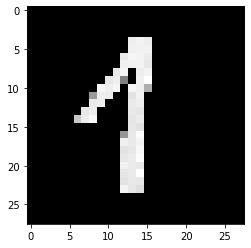

This is 1


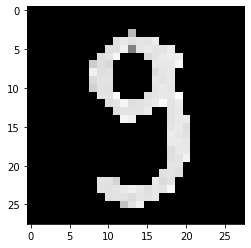

This is 5


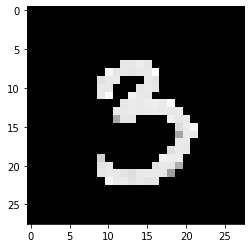

This is 3


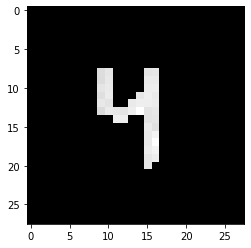

This is 4


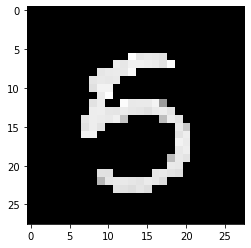

This is 5


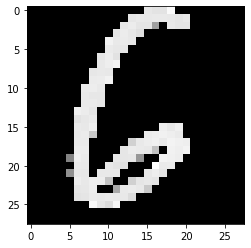

This is 6


In [25]:
import tensorflow as tf

for k in range(1,7):
    img = Image.open(fr'real_data\digit{k}.jpg')
    img = tf.image.rgb_to_grayscale(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (28, 28))
    array = tf.keras.preprocessing.image.img_to_array(img)
    image = tf.keras.preprocessing.image.array_to_img(array)
    array = (array - array.min()) / (array.max() - array.min())
    array = (1 - array)
    array[array < 0.5] = 0
    data = array.reshape(1, 28, 28, 1)
    img = tf.keras.preprocessing.image.array_to_img(array)
    plt.imshow(img, cmap='gray')
    plt.show()
    y_pred = model2.predict(data).round()
    s = pd.DataFrame(y_pred)
    result = pd.DataFrame(pd.get_dummies(s).idxmax(1))
    print(f'This is {result.iloc[0].iloc[0]}')
